In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns
import numpy as np
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('king')

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
orange = '#fd6900'
green = '#00b67d'

# True death rate

In [5]:
deaths_all = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
infections_all = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [6]:
deaths_all =(
                    deaths_all
                    .groupby("Country/Region").sum()
                    .drop(["Lat", "Long"], axis = 1)
                  )


infections_all =(
                        infections_all
                        .groupby("Country/Region").sum()
                        .drop(["Lat", "Long"], axis = 1)
                      )

In [7]:
death_rate_all = (
                deaths_all
                .div(infections_all)
                .fillna(0)
                .T
)

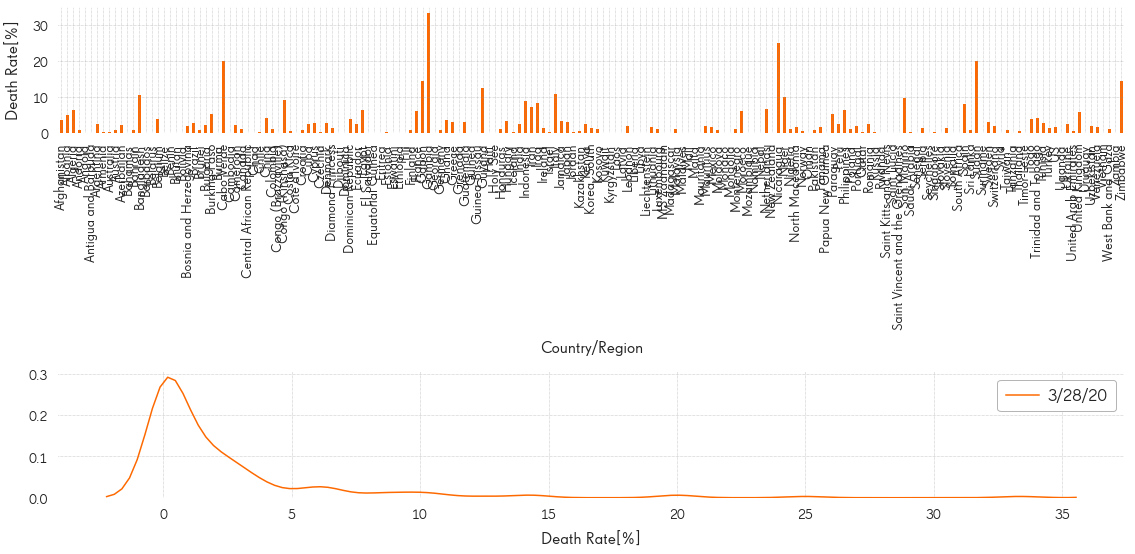

In [8]:
fig, ax = plt.subplots(2, 1)
(100*death_rate_all.iloc[-1]).plot(kind = "bar", ax = ax[0])
sns.kdeplot(100*death_rate_all.iloc[-1], ax = ax[1])

ax[0].set_ylabel("Death Rate[%]")
ax[1].set_xlabel("Death Rate[%]")

fig.tight_layout()

## Selected Countries only

In [9]:
selected_countries = ['Japan', 'Singapore', 'Canada',
       'Australia', 'Germany', 'Finland',
       'Sweden','Belgium','Switzerland', 'Austria', 'Israel', 'Norway',  'Andorra', 'US', 'China',
       'Korea, South', 'France', 'Denmark', 'United Kingdom', 'Netherlands']

In [10]:
deaths = deaths_all[deaths_all.index.isin(selected_countries)].T
infections =infections_all[infections_all.index.isin(selected_countries)].T

death_rate = deaths.div(infections).fillna(0)


Text(0.5, 0, 'Death Rate[%]')

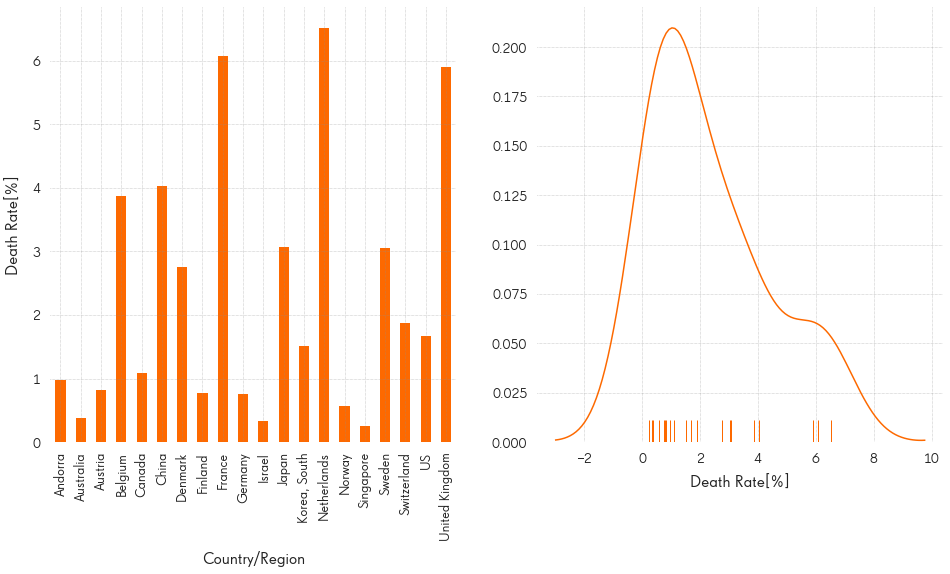

In [11]:
fig, ax = plt.subplots(1, 2)
(100*death_rate.iloc[-1]).plot(kind = "bar", ax = ax[0])
sns.distplot(100*death_rate.iloc[-1], hist=False, rug=True);

ax[0].set_ylabel("Death Rate[%]")
ax[1].set_xlabel("Death Rate[%]")

In [12]:
(death_rate.iloc[-1][death_rate.iloc[-1] < 0.03].mean())

0.010584745048510561

In [13]:
100*(death_rate.iloc[-1][death_rate.iloc[-1] > 0.03].mean())

4.643097785191306

We observe a bimodal distribution for the death rate, with one rate around 1% and another around 4.7%.

In [14]:
100*(death_rate.iloc[-1].mean())

2.3130926529701434

## Find death rate that minimizes MSE

$$
\mbox{deaths} = \beta\cdot\mbox{infections} +\alpha
$$



Where $\beta$ corresponds to the death rate.

In [15]:
X = infections.iloc[-1].values.reshape(-1, 1)
y = deaths.iloc[-1].values.reshape(-1, 1)

In [16]:
reg = LinearRegression(fit_intercept=False).fit(X, y)

In [17]:
reg.coef_

array([[0.02441298]])

The computed death rate that should be "closer" on average to the true one is 3.4%

# True infections in Spain and Italy

In [18]:
deaths_all.T[["Spain", "Italy"]].iloc[-1].div(0.034)

Country/Region
Spain    175941.176471
Italy    294794.117647
Name: 3/28/20, dtype: float64

In [19]:
infections_all.T[["Spain", "Italy"]].iloc[-1]

Country/Region
Spain    73235
Italy    92472
Name: 3/28/20, dtype: int64